In [3]:
from tensorflow.keras.preprocessing import image
import numpy as np
from tensorflow.keras.models import *
import matplotlib.pyplot as plt

In [9]:
def predict(path):

    img = image.load_img(path, target_size=(432, 288))
    
    # Preprocessing the image
    pp_img = image.img_to_array(img)
    pp_img = pp_img/255
    pp_img = np.expand_dims(pp_img, axis=0)
    
    #Load Model
    saved_model = load_model("Mel_VGG16.h5")

    #predict
    img_pred= saved_model.predict(pp_img)
    
    if img_pred[0][0] >= 0.5: 
        pred = ('Abnormal')
    
    else: 
        pred = ('Normal')
        
    plt.title("Anomaly Detection\n"+ pred)  

    plt.imshow(np.squeeze(pp_img))
    
    return  plt.show()

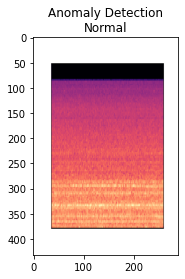

In [16]:
path = '/Users/yusufakcakaya/GitHub/Machine-Condition-Monitoring/prediction_images/normal_3000.png'
predict(path)